# <span style="background-color: lightcyan;">Brain Tumor Imaging Classification for Early Detection</span>

[Problem Identification](#Problem-Identification)- In this step I explain what the problem is and what the process to solve the problesm is. 

[Data Wrangling](#Data-Wrangling) - In this step I loaded te data and familiarized myself with it. This helped me identify issues I could face when dealing with the data.  I performed several preprocessing techniques, including standardization, resizing, normalization, and contrast enhancements. Additionally, I conducted a metadata analysis to assess the structure and integrity of the dataset, ensuring its readiness for exploratory and modeling tasks.

[Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))- In this step I vizualised data characteristics to further understand the images and data features Im dealing with. 



## Problem Identification

**<span style="color: lightcoral;">Problem Identification</span>**


The client, NeuroScan Diagnostics, is a leading healthcare provider specializing in medical imaging and early disease detection. One of the biggest challenges in brain tumor diagnosis is the accurate and timely classification of tumors based on MRI scans. Misclassification or delayed detection can lead to incorrect treatment plans, increasing risks for patients.
To address this, NeuroScan Diagnostics seeks to implement an AI-powered deep learning model capable of identifying glioma tumors, meningioma tumors, pituitary tumors, or no tumor based on brain images. By integrating a robust classification system, the organization aims to support radiologists with automated tumor detection, improving diagnostic precision and reducing manual workload. A reliable deep learning model must be developed and deployed by the end of the fiscal year to ensure readiness for clinical validation and real world applications.



## Data Wrangling & Pre-Processing

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import random


add original images before tweaks 

**<span style="color: lightcoral;">Standardize</span>**: image sizes to maintain uniformity across the dataset.

**<span style="color: lightcoral;">Resizing</span>** : Adjust images to a fixed size for model compatibility.

**<span style="color: lightcoral;">Normalization</span>**: Scale pixel values (e.g., between 0 and 1) to improve model performance.

**<span style="color: lightcoral;">Contrast Enhancement</span>**: Apply techniques like histogram equalization to improve visibility.

**<span style="color: lightcoral;">Metadata Analysis</span>**: Check image formats, dimensions, and color channels.




In [2]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']


In [3]:
X_train = []
y_train = []

image_size = 150
for i in labels:
    folderPath = os.path.join('dataset_extracted/Tumor Data', 'Training', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(image_size, image_size))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img = clahe.apply(img)  # Apply CLAHE for controlled contrast enhancement
        img = img / 255.0  # Normalize pixel values to range [0, 1]
        X_train.append(img)
        y_train.append(i)

100%|███████████████████████████████████████████████████████████████████████████████| 827/827 [00:04<00:00, 184.00it/s]


In [4]:
X_test = []
y_test = []

for i in labels:
    folderPath = os.path.join('dataset_extracted/Tumor Data', 'Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(image_size, image_size))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img = clahe.apply(img)  # Apply CLAHE for controlled contrast enhancement
        img = img / 255.0  # Normalize pixel values to range [0, 1]
        X_test.append(img)
        y_test.append(i)

100%|█████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 106.13it/s]


In these two cells the trainign data and testing data where extracted, standardised, resized and normalized for bettere accuracy trainig of the model. 

In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test =  np.array(y_test)

Here the training and testing lists are turned into NumPy arrays because deep learning models, like CNNs that I'll be using , work with numerical tensors not lists or raw images.



## Exploratory Data Analysis (EDA)

**<span style="color: lightcoral;"> Data Quality Assessment</span>**

- To begin EDA I will do a **Visual Inspection** and display random images from the training and testing data. They both look great. I dont see any anomalities. 

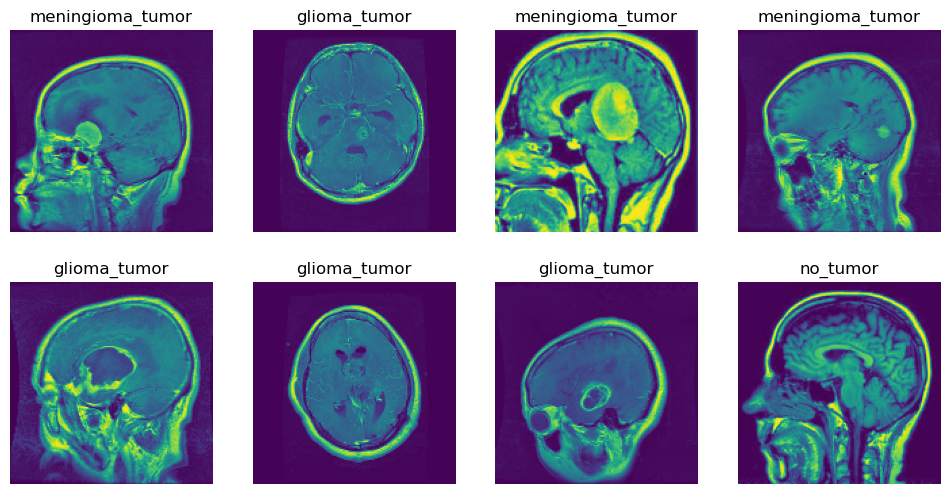

In [6]:
# Define how many images to display
num_images = 8
indices = np.random.choice(len(X_train), num_images, replace=False)

# Plot images
plt.figure(figsize=(12,6))
for i, idx in enumerate(indices):
    plt.subplot(2, 4, i+1)  # Arrange in a 2-row, 4-column grid
    plt.imshow(X_train[idx])
    plt.title(y_train[idx])  # Display the corresponding label
    plt.axis('off')

plt.show()


Here I'm just taking a look at how my images are looking so I can Porceed with new techniques. 

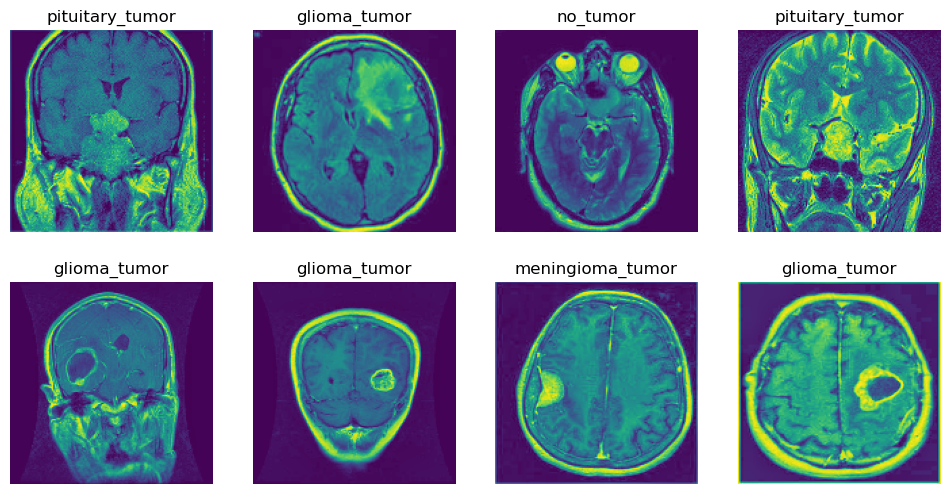

In [7]:
# Define how many images to display
num_images = 8
indices_2 = np.random.choice(len(X_test), num_images, replace=False)

# Plot images
plt.figure(figsize=(12,6))
for i, idx in enumerate(indices_2):
    plt.subplot(2, 4, i+1)  # Arrange in a 2-row, 4-column grid
    plt.imshow(X_test[idx])
    plt.title(y_test[idx])  # Display the corresponding label
    plt.axis('off')

plt.show()



**<span style="color: lightcoral;">Image Count Per Class</span>**: Ensure balanced class distribution to avoid bias.



In [8]:
X_train.shape

(3310, 150, 150)

In [9]:
y_train.shape

(3310,)

In [10]:
y_train_df =  pd.DataFrame(y_train)
y_train_df.head()

,0
0,glioma_tumor
1,glioma_tumor
2,glioma_tumor
3,glioma_tumor
4,glioma_tumor


In [11]:
y_train_df.value_counts()

0               
no_tumor            835
pituitary_tumor     827
glioma_tumor        826
meningioma_tumor    822
Name: count, dtype: int64

The dataset shows to be quite balanced! I do not need to balance the dataset because all categories fall in the same range. 

In [12]:
X_test.shape

(394, 150, 150)

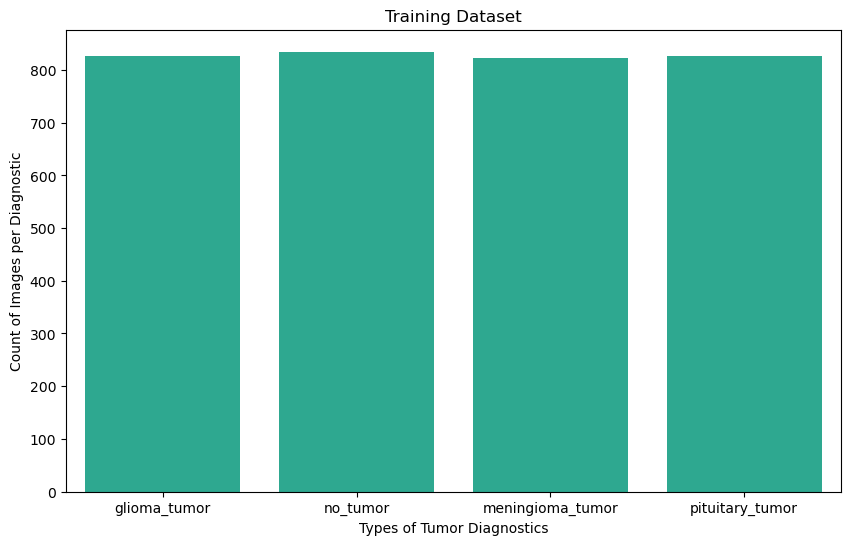

In [13]:
plt.figure(figsize = (10,6))
sns.countplot(x = y_train_df.iloc[:,0], color='#1abc9c')
plt.xlabel("Types of Tumor Diagnostics")
plt.ylabel("Count of Images per Diagnostic")
plt.title("Training Dataset")
plt.show()

**<span style="color: lightcoral;">Bar Chart of Class Frequencies</span>**: Identify underrepresented categories.


In [14]:
y_test.shape

(394,)

In [15]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,0
0,glioma_tumor
1,glioma_tumor
2,glioma_tumor
3,glioma_tumor
4,glioma_tumor


In [16]:
y_test_df.value_counts()

0               
meningioma_tumor    115
no_tumor            105
glioma_tumor        100
pituitary_tumor      74
Name: count, dtype: int64

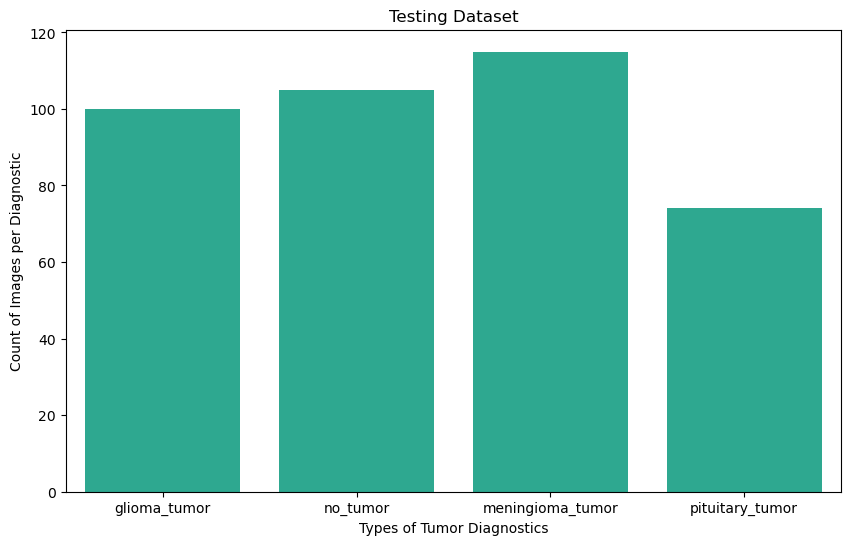

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(x = y_test_df.iloc[:,0], color='#1abc9c')
plt.xlabel("Types of Tumor Diagnostics")
plt.ylabel("Count of Images per Diagnostic")
plt.title("Testing Dataset")
plt.show()

The testing data on the otherhand is quite unbalanced. Evaluation techniques like precision, recall, and F1-score, because they account for class imbalance.

**<span style="color: lightcoral;">Color & Pixel Distribution</span>**

**<span style="color: lightcoral;">Heatmaps</span>**: Visualize pixel intensity variations across images.

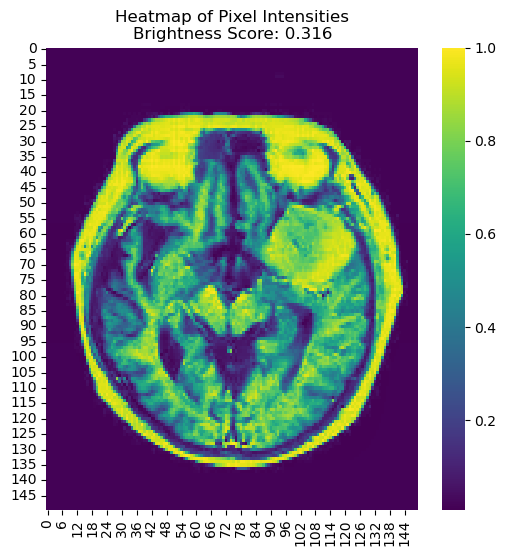

In [21]:
random_img = random.choice(X_train)

# Compute brightness score
brightness_score = np.mean(random_img)  # Average pixel intensity (0-1 scaled)

# Display heatmap
plt.figure(figsize=(6,6))
sns.heatmap(random_img, cmap="viridis")
plt.title(f"Heatmap of Pixel Intensities\nBrightness Score: {brightness_score:.3f}")
plt.show()



Every time this cell is executed it will run a picture with its brightness score. Higher brightness scores mean theres a higher chance of a tumor being present. 

## Model Selection & Training

**<span style="color: lightcoral;">Model Selection & Training</span>**


- Choose **appropriate algorithms** (e.g., Random Forest, CNNs, XGBoost).
- Split data into **training, validation, and test sets**.
- Tune hyperparameters to optimize model performance.


## Model Evaluation & Validation

**<span style="color: lightcoral;"> Model Evaluation & Validation</span>**

- Assess performance using **accuracy, precision, recall, F1-score, AUC-ROC**.
- Compare different models to find the best-performing one.
- Address potential **bias and overfitting**.


## Model Optimization

**<span style="color: lightcoral;"> Model Optimization</span>**



## Final Model